# 필요 패키지 import

In [30]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import plot_importance, XGBClassifier

import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import os

os.path.abspath('.')

'C:\\Users\\user\\projects\\ml\\dacon\\잡케어 추천 알고리즘 경진대회'

# 데이터 불러오기

In [26]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 데이터 확인

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [5]:
train.shape

(501951, 35)

In [9]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


# 필요 데이터 추출

모델 학습시 id는 제외해야하고

베이스라인에선 contents_open_dt를 제거하고 진행하였습니다

In [27]:
train = train.drop(['id', 'contents_open_dt'], axis=1) 

test = test.drop(['id', 'contents_open_dt'], axis=1)

In [28]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0


# 데이터 탐색

In [113]:
corr_matrix = train.corr()
corr_matrix['target'].sort_values(ascending=False)

target                    1.000000
d_l_match_yn              0.142670
d_m_match_yn              0.118406
d_s_match_yn              0.087591
person_prefer_e           0.032915
contents_attribute_e      0.024869
contents_attribute_k      0.023783
person_attribute_a_1      0.022103
h_l_match_yn              0.018988
person_prefer_c           0.016768
contents_attribute_i      0.014837
h_s_match_yn              0.006311
h_m_match_yn              0.004264
person_attribute_b       -0.003641
contents_attribute_a     -0.008566
contents_attribute_j_1   -0.010707
person_attribute_a       -0.015284
contents_attribute_m     -0.015300
contents_attribute_l     -0.023740
person_prefer_d_3        -0.023895
person_prefer_d_2        -0.028528
person_prefer_d_1        -0.029676
person_prefer_h_3        -0.029770
person_rn                -0.031704
contents_rn              -0.035738
person_prefer_h_2        -0.035839
contents_attribute_j     -0.036308
person_prefer_h_1        -0.043870
contents_attribute_h

# 데이터 나누기

In [31]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1:]

In [86]:
X.shape

(501951, 32)

In [90]:
drop_columns = ['d_m_match_yn', 'h_m_match_yn', 'h_s_match_yn', 'h_l_match_yn', 'contents_attribute_j', 'd_s_match_yn', 'contents_attribute_k', 'person_prefer_f', 'person_prefer_g']

In [91]:
X.drop(drop_columns, axis=1, inplace=True)

In [92]:
X.shape

(501951, 23)

In [93]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# 모델 학습

RandomForest를 이용한 학습

## RandomForest 

In [94]:
model = RandomForestClassifier(n_estimators=300, max_depth=60, n_jobs=-1)


model.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, n_estimators=300, n_jobs=-1)

## xgboost

In [107]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=6)

In [108]:
xgb.fit(X_train, y_train)

[15:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 하이퍼파라미터 튜닝

In [57]:
xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [100, 200, 400, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15],
    'max_depth' : [4, 6, 8, 10, 12],
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='accuracy', n_jobs= -1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[10:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...ors=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
             

## 모델 검증

In [95]:
def get_metrics(y_test, pred):
    score = [0, 0, 0]
    score[0] = metrics.precision_score(y_test, pred) # 정확도
    score[1] = metrics.recall_score(y_test, pred) # 재현율
    score[2] = metrics.f1_score(y_test, pred) # f1 score
    
    return score

### RandomForest

In [37]:
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred)
print('정확도: ', acc_score)

정확도:  0.6217792374006906


In [46]:
score = get_metrics(y_test, pred)

print('정확도: ', score[0])
print('재현율: ', score[1])
print('f1 score: ', score[2])

정확도:  0.6173114356649144
재현율:  0.6397878689039491
f1 score:  0.6283487174619746


#### drop columns

In [96]:
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred)
print('정확도: ', acc_score)

정확도:  0.6235722392601


In [97]:
score = get_metrics(y_test, pred)

print('정확도: ', score[0])
print('재현율: ', score[1])
print('f1 score: ', score[2])

정확도:  0.6162735097226649
재현율:  0.6539218884016478
f1 score:  0.6345397532456114


### xgboost

In [51]:
# not drop
pred = xgb.predict(X_test) 
acc_score = accuracy_score(y_test, pred)
print('정확도: ', acc_score)

정확도:  0.620511458308179


In [111]:
# drop 
pred = xgb.predict(X_test)
acc_score = accuracy_score(y_test, pred)
print('정확도: ', acc_score)

정확도:  0.6239465359445558


In [59]:
pred2 = xgb_grid.predict(X_test)
acc_score = accuracy_score(y_test, pred2)
print('정확도: ', acc_score)

정확도:  0.6345838062350583


In [60]:
score = get_metrics(y_test, pred2)

print('정확도: ', score[0])
print('재현율: ', score[1])
print('f1 score: ', score[2])

정확도:  0.624949458645941
재현율:  0.6721873905217507
f1 score:  0.6477082908942757


In [52]:
score = get_metrics(y_test, pred)

print('정확도: ', score[0])
print('재현율: ', score[1])
print('f1 score: ', score[2])

정확도:  0.6100898670233345
재현율:  0.666751229176482
f1 score:  0.6371633399905338


#### drop columns

In [101]:
pred_1 = xgb.predict(X_test)
acc_score = accuracy_score(y_test, pred_1)
print('정확도: ', acc_score)

정확도:  0.6049962570331554


In [102]:
score = get_metrics(y_test, pred_1)

print('정확도: ', score[0])
print('재현율: ', score[1])
print('f1 score: ', score[2])

정확도:  0.5916588298692927
재현율:  0.6764275963710603
f1 score:  0.6312099110575026


# feature importance

In [65]:
importances = model.feature_importances_

In [69]:
import matplotlib.pyplot as plt

Feature Ranking: 
1. feature contents_rn (0.083)
2. feature person_rn (0.082)
3. feature contents_attribute_l (0.081)
4. feature contents_attribute_d (0.070)
5. feature person_prefer_d_2 (0.063)
6. feature person_prefer_d_1 (0.060)
7. feature contents_attribute_h (0.059)
8. feature person_prefer_d_3 (0.058)
9. feature person_prefer_h_2 (0.054)
10. feature person_prefer_h_3 (0.050)
11. feature person_prefer_h_1 (0.048)
12. feature person_attribute_a_1 (0.038)
13. feature person_prefer_e (0.033)
14. feature contents_attribute_e (0.029)
15. feature person_attribute_b (0.024)
16. feature contents_attribute_m (0.024)
17. feature person_prefer_c (0.018)
18. feature contents_attribute_j_1 (0.018)
19. feature contents_attribute_i (0.018)
20. feature contents_attribute_a (0.017)
21. feature d_l_match_yn (0.012)
22. feature contents_attribute_c (0.011)
23. feature person_attribute_a (0.010)
24. feature d_m_match_yn (0.008)
25. feature h_m_match_yn (0.007)
26. feature h_s_match_yn (0.006)
27. fea

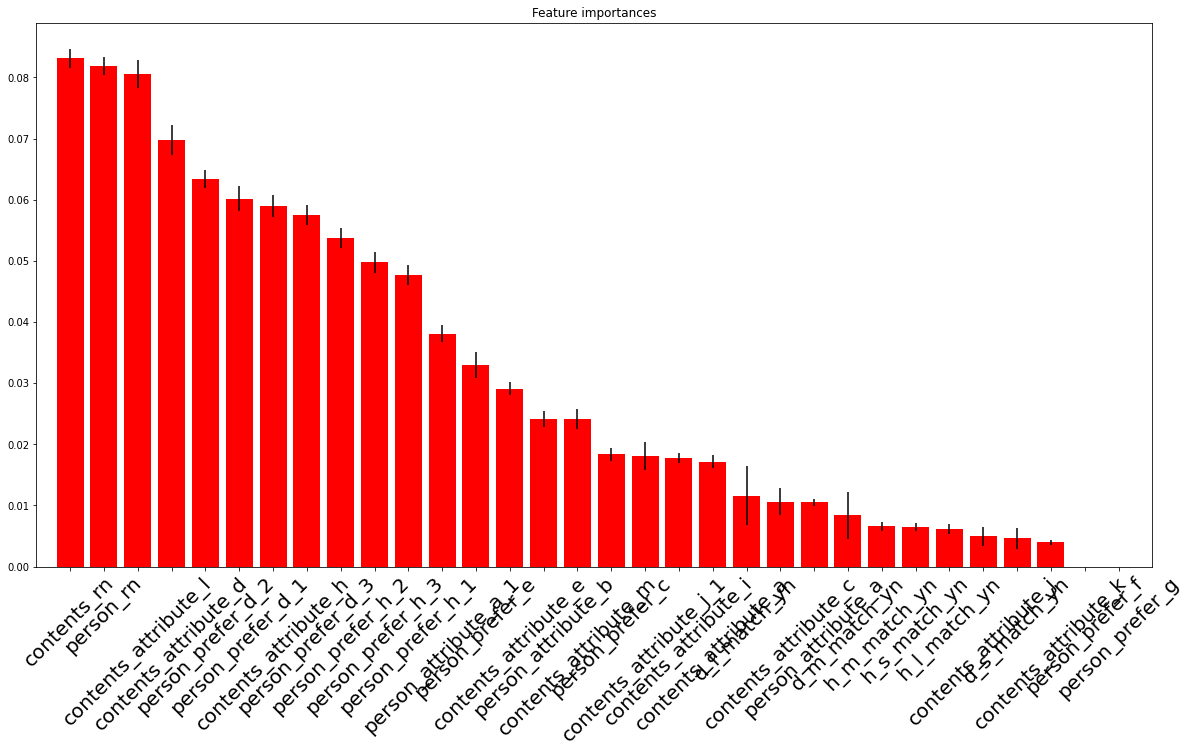

In [80]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature Ranking: ')

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, x.columns[indices][f], importances[indices[f]]))
    
    
plt.figure(figsize =(20, 10))
plt.title('Feature importances')
plt.bar(range(X.shape[1]), importances[indices],
       color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, fontsize=20)
plt.xlim([-1, X.shape[1]])
plt.show()

# Test set 예측

In [6]:
preds = model.predict(test)

In [104]:
test2 = test.drop(drop_columns, axis=1)
preds2 = xgb.predict(test2)

In [109]:
preds3 = xgb_grid.predict(test)

# 제출파일 생성

In [7]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = preds

submission.to_csv('baseline.csv', index=False)

In [106]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = preds2

submission.to_csv('result1.csv', index=False)

In [112]:
# grid search 적용
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = preds3

submission.to_csv('result2.csv', index=False)